# Demo do projeto

Através deste notebook é possível testar o funcionamento do nosso projeto de uma forma ágil e simples. Está dividido em várias secções cujo objetivo é facilitar a compreensão geral da simulação e dos algortimos de aprendizagem utilizados.

Podemos separar este notebook nas seguintes secções úteis:
* Teste da simulação e comportamento do agente com o agente aleatório
* Política fixa, análise de desempenho para os problemas
* Algoritmo genético + Redes Neuronais para ambos os problemas
* Aprendizagem por reforço para ambos os problemas

De notar que o nosso projeto foi criado para ser configurado através de ficheiros, nomeadamente: ficheiro do controlador, da simulação e do(s) agente(s). Por agora, os modelos de aprendizagem apenas funcionam com 1 agente, algo que poderá mudar mais tarde.

**Conteúdo dos ficheiros**:
* Ficheiro do Controlador: modo (se teste se aprendizagem); problema (se recoleção, se farol); ficheiro do motor de simulação usado e os vários parâmetros dos algoritmos
* Ficheiro do Motor de Simulação (independente do modo ou do problema): nº de passos máximos; descrição do ambiente (tamanho e elementos) e ficheiro(s) dos agente(s)
* Ficheiro do Agente: id; posição inicial; ângulo inicial e sensor

Como nos apercebemos que pode ser complicado gerir os ficheiros, criámos este notebook para que fosse agilizado o processo de teste.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from controladorGenetico import *


 #### *Funções Auxiliares Fixo e Aleatório*

In [23]:
from controlador import criarControlador

paredes = \
"""E parede (9,8) False True 0
E parede (9,9) False True 0
E parede (9,10) False True 0
E parede (9,11) False True 0
E parede (9,12) False True 0
E parede (9,13) False True 0
E parede (9,14) False True 0
E parede (9,15) False True 0
E parede (9,16) False True 0
E parede (9,17) False True 0
E parede (9,18) False True 0
E parede (5,44) False True 0
E parede (6,44) False True 0
E parede (7,44) False True 0
E parede (8,44) False True 0
E parede (9,44) False True 0
E parede (10,44) False True 0
E parede (11,44) False True 0
E parede (12,44) False True 0
E parede (13,44) False True 0
E parede (14,44) False True 0
E parede (15,44) False True 0
E parede (16,44) False True 0
E parede (17,44) False True 0
E parede (18,44) False True 0
E parede (19,44) False True 0
E parede (20,44) False True 0
E parede (21,44) False True 0
E parede (22,44) False True 0
E parede (13,21) False True 0
E parede (13,22) False True 0
E parede (13,23) False True 0
E parede (13,24) False True 0
E parede (13,25) False True 0
E parede (13,26) False True 0
E parede (13,27) False True 0
E parede (13,28) False True 0
E parede (13,29) False True 0
E parede (13,30) False True 0
E parede (13,31) False True 0
E parede (20,26) False True 0
E parede (21,26) False True 0
E parede (22,26) False True 0
E parede (23,26) False True 0
E parede (24,26) False True 0
E parede (25,26) False True 0
E parede (26,26) False True 0
E parede (27,26) False True 0
E parede (28,26) False True 0
E parede (29,26) False True 0
E parede (30,26) False True 0
E parede (31,26) False True 0
E parede (32,26) False True 0
E parede (9,19) False True 0
E parede (9,20) False True 0
E parede (9,21) False True 0
E parede (9,22) False True 0
E parede (9,23) False True 0
E parede (9,24) False True 0
E parede (9,25) False True 0
E parede (9,26) False True 0
E parede (23,44) False True 0
E parede (24,44) False True 0
E parede (25,44) False True 0
E parede (26,44) False True 0
E parede (27,44) False True 0
E parede (28,44) False True 0
E parede (29,44) False True 0
E parede (30,44) False True 0
E parede (13,32) False True 0
E parede (13,33) False True 0
E parede (13,34) False True 0
E parede (13,35) False True 0
E parede (13,36) False True 0
E parede (13,37) False True 0
E parede (13,38) False True 0
E parede (13,39) False True 0
E parede (33,26) False True 0
E parede (34,26) False True 0
E parede (35,26) False True 0
E parede (36,26) False True 0
E parede (37,26) False True 0
E parede (38,26) False True 0
E parede (39,26) False True 0
E parede (40,26) False True 0
E parede (35,1) False True 0
E parede (35,2) False True 0
E parede (35,3) False True 0
E parede (35,4) False True 0
E parede (35,5) False True 0
E parede (35,6) False True 0
E parede (35,7) False True 0
E parede (35,8) False True 0
E parede (35,9) False True 0
E parede (35,10) False True 0
E parede (35,11) False True 0
E parede (35,12) False True 0
E parede (35,13) False True 0
E parede (35,14) False True 0
E parede (35,15) False True 0"""


coletaveis_e_ninhos = """E ovo (1,1) True False 6
E ovo (3,3) True False 7
E ovo (5,8) True False 7
E ovo (7,40) True False 9
E ovo (10,3) True False 8
E ovo (11,40) True False 5
E ovo (15,12) True False 6
E ovo (18,4) True False 4
E ovo (25,5) True False 7
E ovo (30,2) True False 3
E ovo (38,18) True False 6
E ovo (42,40) True False 10
E ovo (28,42) True False 5
E ovo (40,24) True False 8
E ovo (4,15) True False 6
E ninho (2,28) False False 0
E ninho (18,38) False False 0
E ninho (30,35) False False 0
E ninho (42,2) False False 0
E ninho (44,20) False False 0"""


def resetFarol(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente,politica):
    texto_controlador = f"A\nF\n{politica}\nMS {ficheiro_simulacao}"
    texto_simulacao = f"5\n20\nAG {ficheiro_agente}\nE farol (3,3) False False 100"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulacao)
    with open("agentes/"+ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)



def resetRecolecao(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente,politica,tempo):
    texto_controlador = f"A\nR {tempo}\n{politica}\nMS {ficheiro_simulacao}"
    texto_simulacao = f"5\n20\nAG {ficheiro_agente}\nE ovo (0,4) True False 6\nE ninho (4,4) False False 0"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulacao)
    with open("agentes/"+ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

## Teste da Simulação com o Agente Aleatório

### Farol

In [ ]:
ficheiro_controlador = "controladorAleatorio_farol.txt"
resetFarol(ficheiro_controlador,"simulacao_farol_aleatorio.txt","agente_aleatorio_farol.txt","aleatorio")

In [ ]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recolecao

In [ ]:
ficheiro_controlador = "controladorAleatorio_recolecao.txt"
resetRecolecao(ficheiro_controlador,"simulacao_recolecao_aleatorio.txt","agente_aleatorio_recolecao.txt","aleatorio",30)

In [ ]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste da Política Fixa

### Farol

In [6]:
ficheiro_controlador = "controladorFixo_farol.txt"
resetFarol(ficheiro_controlador, "simulacao_farol_fixo.txt", "agente_fixo_farol.txt", "fixo")
controlador = criarControlador(ficheiro_controlador)

In [7]:
controlador.executa()

In [9]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recolecao

In [24]:
ficheiro_controlador = "controladorFixo_recolecao.txt"
resetRecolecao(ficheiro_controlador, "simulacao_recolecao_fixo.txt", "agente_fixo_recolecao.txt", "fixo",30)
controlador = criarControlador(ficheiro_controlador)

In [25]:
controlador.executa()

In [29]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste do Algoritmo Genético

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
#so para funcionae

def graficoCaminhos(caminhos,motor):

    grelha_size = motor.ambiente.tamanhoGrelha

    fig, ax = plt.subplots(figsize=(grelha_size * 0.7, grelha_size * 0.7))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    ax.set_xlim(0, grelha_size)
    ax.set_ylim(grelha_size, 0)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    cmap = plt.get_cmap("rainbow")
    colors = cmap(np.linspace(0, 1, len(caminhos)))

    if len(caminhos) == 1:
        plot_gens = [0]
    else:
        indices = {0, len(caminhos)//2, len(caminhos)-1}
        plot_gens = sorted(list(indices))

    for i in plot_gens:
        path = caminhos[i]

        x_vals = [p.getX() for p in path]
        y_vals = [p.getY() for p in path]

        ax.plot(x_vals, y_vals, color=colors[i], alpha=0.7,
                label=f"Geração {i+1}", linewidth=2)

        if x_vals:
            ax.plot(x_vals[-1], y_vals[-1], 'x', color=colors[i],
                    markersize=10, markeredgewidth=2)

    for pos, ele in motor.ambiente.grelha.items():
        if ele.getId() != (-1, -1, -1):
            ax.text(
                pos.x,
                pos.y,
                str(ele) if hasattr(ele, "nome") else str(ele),
                fontsize=13,
                ha="center",
                va="center",
                color="black",
                fontweight="bold"
            )

    ax.set_title("Melhores Caminhos por Geração", pad=20)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.grid(True, color='lightgray', linestyle='--')

    ax.legend(loc='lower right')
    plt.show()

def grafico_fitness_recompensas(valores,tipo):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(valores)),valores, marker='o')
    if tipo == "reforco": mensagem = "Episodes"
    else: mensagem = "Generation"
    plt.title("Average Combined Fitness per " + mensagem)
    plt.xlabel(mensagem)
    plt.ylabel("Average Combined Fitness Score")
    plt.grid(True)
    plt.show()

def grafico_passos(passos):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(passos)), passos, marker='o')
    plt.title("Nº de Passos até à condição de fim")
    plt.xlabel("Nº repetições")
    plt.ylabel("Passos")
    plt.grid(True)
    plt.show()

def criar_heatmap(mapa, tamanho_base=1.0, cmap="coolwarm", titulo="Heatmap de Visitas"):

    # Converter para arrays NumPy
    coords = np.array([(p.x, p.y) for p in mapa.keys()])
    valores = np.array(list(mapa.values()))

    xs = coords[:, 0]
    ys = coords[:, 1]

    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()

    largura = x_max - x_min + 1
    altura = y_max - y_min + 1

    # Criar matriz heatmap diretamente
    heatmap = np.zeros((altura, largura), dtype=float)
    heatmap[ys - y_min, xs - x_min] = valores

    fig, ax = plt.subplots(
        figsize=(largura * tamanho_base, altura * tamanho_base)
    )

    # Plot
    im = ax.imshow(
        heatmap,
        cmap=cmap,
        interpolation="nearest",
        aspect="equal",
        origin="upper"
    )

    plt.colorbar(im, label="Número de Visitas")

    # Ticks e rótulos
    ax.set_xticks(np.arange(largura))
    ax.set_yticks(np.arange(altura))
    ax.set_xticklabels(np.arange(x_min, x_max + 1))
    ax.set_yticklabels(np.arange(y_min, y_max + 1))

    ax.set_xlabel("Posição X")
    ax.set_ylabel("Posição Y")
    ax.set_title(titulo)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    for pos, ele in motor.ambiente.grelha.items():
        if ele.getId() != (-1, -1, -1):
            ax.text(
                pos.x,
                pos.y,
                str(ele) if hasattr(ele, "nome") else str(ele),
                fontsize=20,
                ha="center",
                va="center",
                color="black",
                fontweight="bold"
            )

    # Grelha
    ax.set_xticks(np.arange(-.5, largura, 1), minor=True)
    ax.set_yticks(np.arange(-.5, altura, 1), minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=0.8)

    plt.tight_layout()
    plt.show()

def criar_heatmap_ref(q, tamanho_base=1.0, cmap="coolwarm", titulo="Heatmap de Q-table"):
    data_flat = []

    for estado_tuple, dic_acoes in q.items():
        for acao, valor in dic_acoes.items():
            data_flat.append([estado_tuple, str(acao), valor])

    df = pd.DataFrame(data_flat, columns=['Estado_ID', 'Acao', 'ValorQ'])

    acoes = sorted(df['Acao'].unique())
    num_acoes = len(acoes)

    unique_states = sorted(df['Estado_ID'].unique())
    state_to_idx = {state_id: i for i, state_id in enumerate(unique_states)}
    num_estados_discretos = len(unique_states)

    heatmap_matrix = np.full((num_estados_discretos, num_acoes), np.nan)

    for _, row in df.iterrows():
        estado_idx = state_to_idx[row['Estado_ID']]
        acao_idx = acoes.index(row['Acao'])
        heatmap_matrix[estado_idx, acao_idx] = row['ValorQ']

    # --- CÓDIGO DE DIVISÃO (Mantido) ---
    ponto_medio = num_estados_discretos // 2
    matrix_top = heatmap_matrix[:ponto_medio, :]
    matrix_bottom = heatmap_matrix[ponto_medio:, :]

    num_estados_top = matrix_top.shape[0]
    num_estados_bottom = matrix_bottom.shape[0]

    # 1. Criação dos Subplots
    fig, (ax_top, ax_bottom) = plt.subplots(
        1, 2,
        figsize=(num_acoes * tamanho_base * 1.5, num_estados_discretos * tamanho_base / 10),
        sharey=False
    )
    fig.suptitle(titulo, fontsize=16)

    vmin_val = np.nanmin(heatmap_matrix) if not np.all(np.isnan(heatmap_matrix)) else 0
    vmax_val = np.nanmax(heatmap_matrix) if not np.all(np.isnan(heatmap_matrix)) else 1

    # --- PLOTAR O GRÁFICO SUPERIOR/ESQUERDO ---

    ax_top.imshow(
        matrix_top, cmap=cmap, interpolation="nearest", aspect="auto", origin="upper",
        vmin=vmin_val, vmax=vmax_val
    )

    ax_top.set_title(f"Parte Superior (Estados 1 a {ponto_medio})", fontsize=10)

    # Configuração do Eixo X
    ax_top.set_xticks(np.arange(num_acoes))
    ax_top.xaxis.set_ticks_position('top')
    ax_top.xaxis.set_label_position('top')
    ax_top.set_xticklabels(acoes, rotation=45, ha="left")
    ax_top.set_xlabel("Ação")

    # Configuração do Eixo Y
    y_indices_top = np.arange(num_estados_top)
    y_labels_top = [str(i + 1) for i in y_indices_top]
    y_labels_esparsos_top = [''] * num_estados_top
    if num_estados_top > 0: y_labels_esparsos_top[0] = y_labels_top[0]
    if num_estados_top == num_estados_discretos and num_estados_top > 1: y_labels_esparsos_top[-1] = y_labels_top[-1]

    ax_top.set_yticks(y_indices_top)
    ax_top.set_yticklabels(y_labels_esparsos_top)
    ax_top.set_ylabel("Estado")

    # Grelha
    ax_top.set_xticks(np.arange(-.5, num_acoes, 1), minor=True)
    ax_top.set_yticks(np.arange(-.5, num_estados_top, 1), minor=True)
    ax_top.grid(which="minor", color="k", linestyle="-", linewidth=0.5)
    ax_top.tick_params(which="minor", size=0)


    # --- PLOTAR O GRÁFICO INFERIOR/DIREITO E COLORBAR ---

    im_bottom = ax_bottom.imshow(
        matrix_bottom,
        cmap=cmap,
        interpolation="nearest",
        aspect="auto",
        origin="upper",
        vmin=vmin_val,
        vmax=vmax_val
    )

    ax_bottom.set_title(f"Parte Inferior (Estados {ponto_medio + 1} a {num_estados_discretos})", fontsize=10)

    # Configuração do Eixo X
    ax_bottom.set_xticks(np.arange(num_acoes))
    ax_bottom.xaxis.set_ticks_position('top')
    ax_bottom.xaxis.set_label_position('top')
    ax_bottom.set_xticklabels(acoes, rotation=45, ha="left")
    ax_bottom.set_xlabel("Ação")

    # Configuração do Eixo Y
    y_indices_bottom = np.arange(num_estados_bottom)
    y_labels_bottom = [str(i + ponto_medio + 1) for i in y_indices_bottom]
    y_labels_esparsos_bottom = [''] * num_estados_bottom
    if num_estados_bottom > 0:
        y_labels_esparsos_bottom[0] = y_labels_bottom[0]
        y_labels_esparsos_bottom[-1] = y_labels_bottom[-1]

    ax_bottom.set_yticks(y_indices_bottom)
    ax_bottom.set_yticklabels(y_labels_esparsos_bottom)
    ax_bottom.set_ylabel("Estado")

    # Grelha
    ax_bottom.set_xticks(np.arange(-.5, num_acoes, 1), minor=True)
    ax_bottom.set_yticks(np.arange(-.5, num_estados_bottom, 1), minor=True)
    ax_bottom.grid(which="minor", color="k", linestyle="-", linewidth=0.5)
    ax_bottom.tick_params(which="minor", size=0)

    # 3. Adicionar a Colorbar APENAS no Subplot Direito
    # Usamos make_axes_locatable para garantir que a colorbar fica colada ao ax_bottom
    divider = make_axes_locatable(ax_bottom)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    fig.colorbar(im_bottom, cax=cax, label="Recompensa")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Farol

In [1]:
from controlador import *

def resetFarolGenetico(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,geracoes,num_individuos,taxa_mutacao,taxa_elite,novelty_weight,num_novelty,num_archives,torneio):
    texto_controlador = f"A\nF\n{politica}\n{geracoes}\n{num_individuos}\n{taxa_mutacao}\n{taxa_elite}\n{novelty_weight}\n{num_novelty}\n{num_archives}\n{torneio}\nMS {ficheiro_simulacao}"
    '''
    texto_simulacao = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    '''
    texto_simulacao = f"50\n200\nAG {ficheiro_agente}\nE farol (40,45) False False 100"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulacao)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)


def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)



In [2]:
GERACOES = 100
NUM_INDIVIDUOS = 200
TAXA_MUTACAO = 0.15
TAXA_ELITE = 0.1
NOVELTY_WEIGHT = 0
NUMBER_NOVELTY = 15
NUMBER_ARCHIVES = 5
NUM_TORNEIO = 5

ficheiro_controlador = "controladorGenetico_farol.txt"
resetFarolGenetico(ficheiro_controlador, "simulacao_farol_genetico.txt", "agente_genetico_farol.txt", "genetico",GERACOES,NUM_INDIVIDUOS,TAXA_MUTACAO,TAXA_ELITE,NOVELTY_WEIGHT,NUMBER_NOVELTY,NUMBER_ARCHIVES,NUM_TORNEIO)


In [3]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Gen 1/100 | Avg Combined: -2836.87 | Melhor fitness: -2.90)
Gen 2/100 | Avg Combined: -1515.39 | Melhor fitness: 488.10)
Gen 3/100 | Avg Combined: -777.76 | Melhor fitness: 488.10)
Gen 4/100 | Avg Combined: -822.28 | Melhor fitness: 490.90)
Gen 5/100 | Avg Combined: -886.26 | Melhor fitness: 490.90)
Gen 6/100 | Avg Combined: -1081.18 | Melhor fitness: 491.10)
Gen 7/100 | Avg Combined: -1158.50 | Melhor fitness: 491.30)
Gen 8/100 | Avg Combined: -938.09 | Melhor fitness: 491.30)
Gen 9/100 | Avg Combined: -638.59 | Melhor fitness: 491.50)
Gen 10/100 | Avg Combined: -197.22 | Melhor fitness: 491.50)
Gen 11/100 | Avg Combined: -105.05 | Melhor fitness: 491.50)
Gen 12/100 | Avg Combined: -432.74 | Melhor fitness: 491.50)
Gen 13/100 | Avg Combined: -352.09 | Melhor fitness: 491.50)
Gen 14/100 | Avg Combined: -497.89 | Melhor fitness: 491.50)
Gen 15/100 | Avg Combined: -543.05 | Melhor fitness: 491.50)
Gen 16/100 | Avg Combined: -647.16 | Melhor fitness: 491.50)
Gen 17/100 | Avg Combined: -49

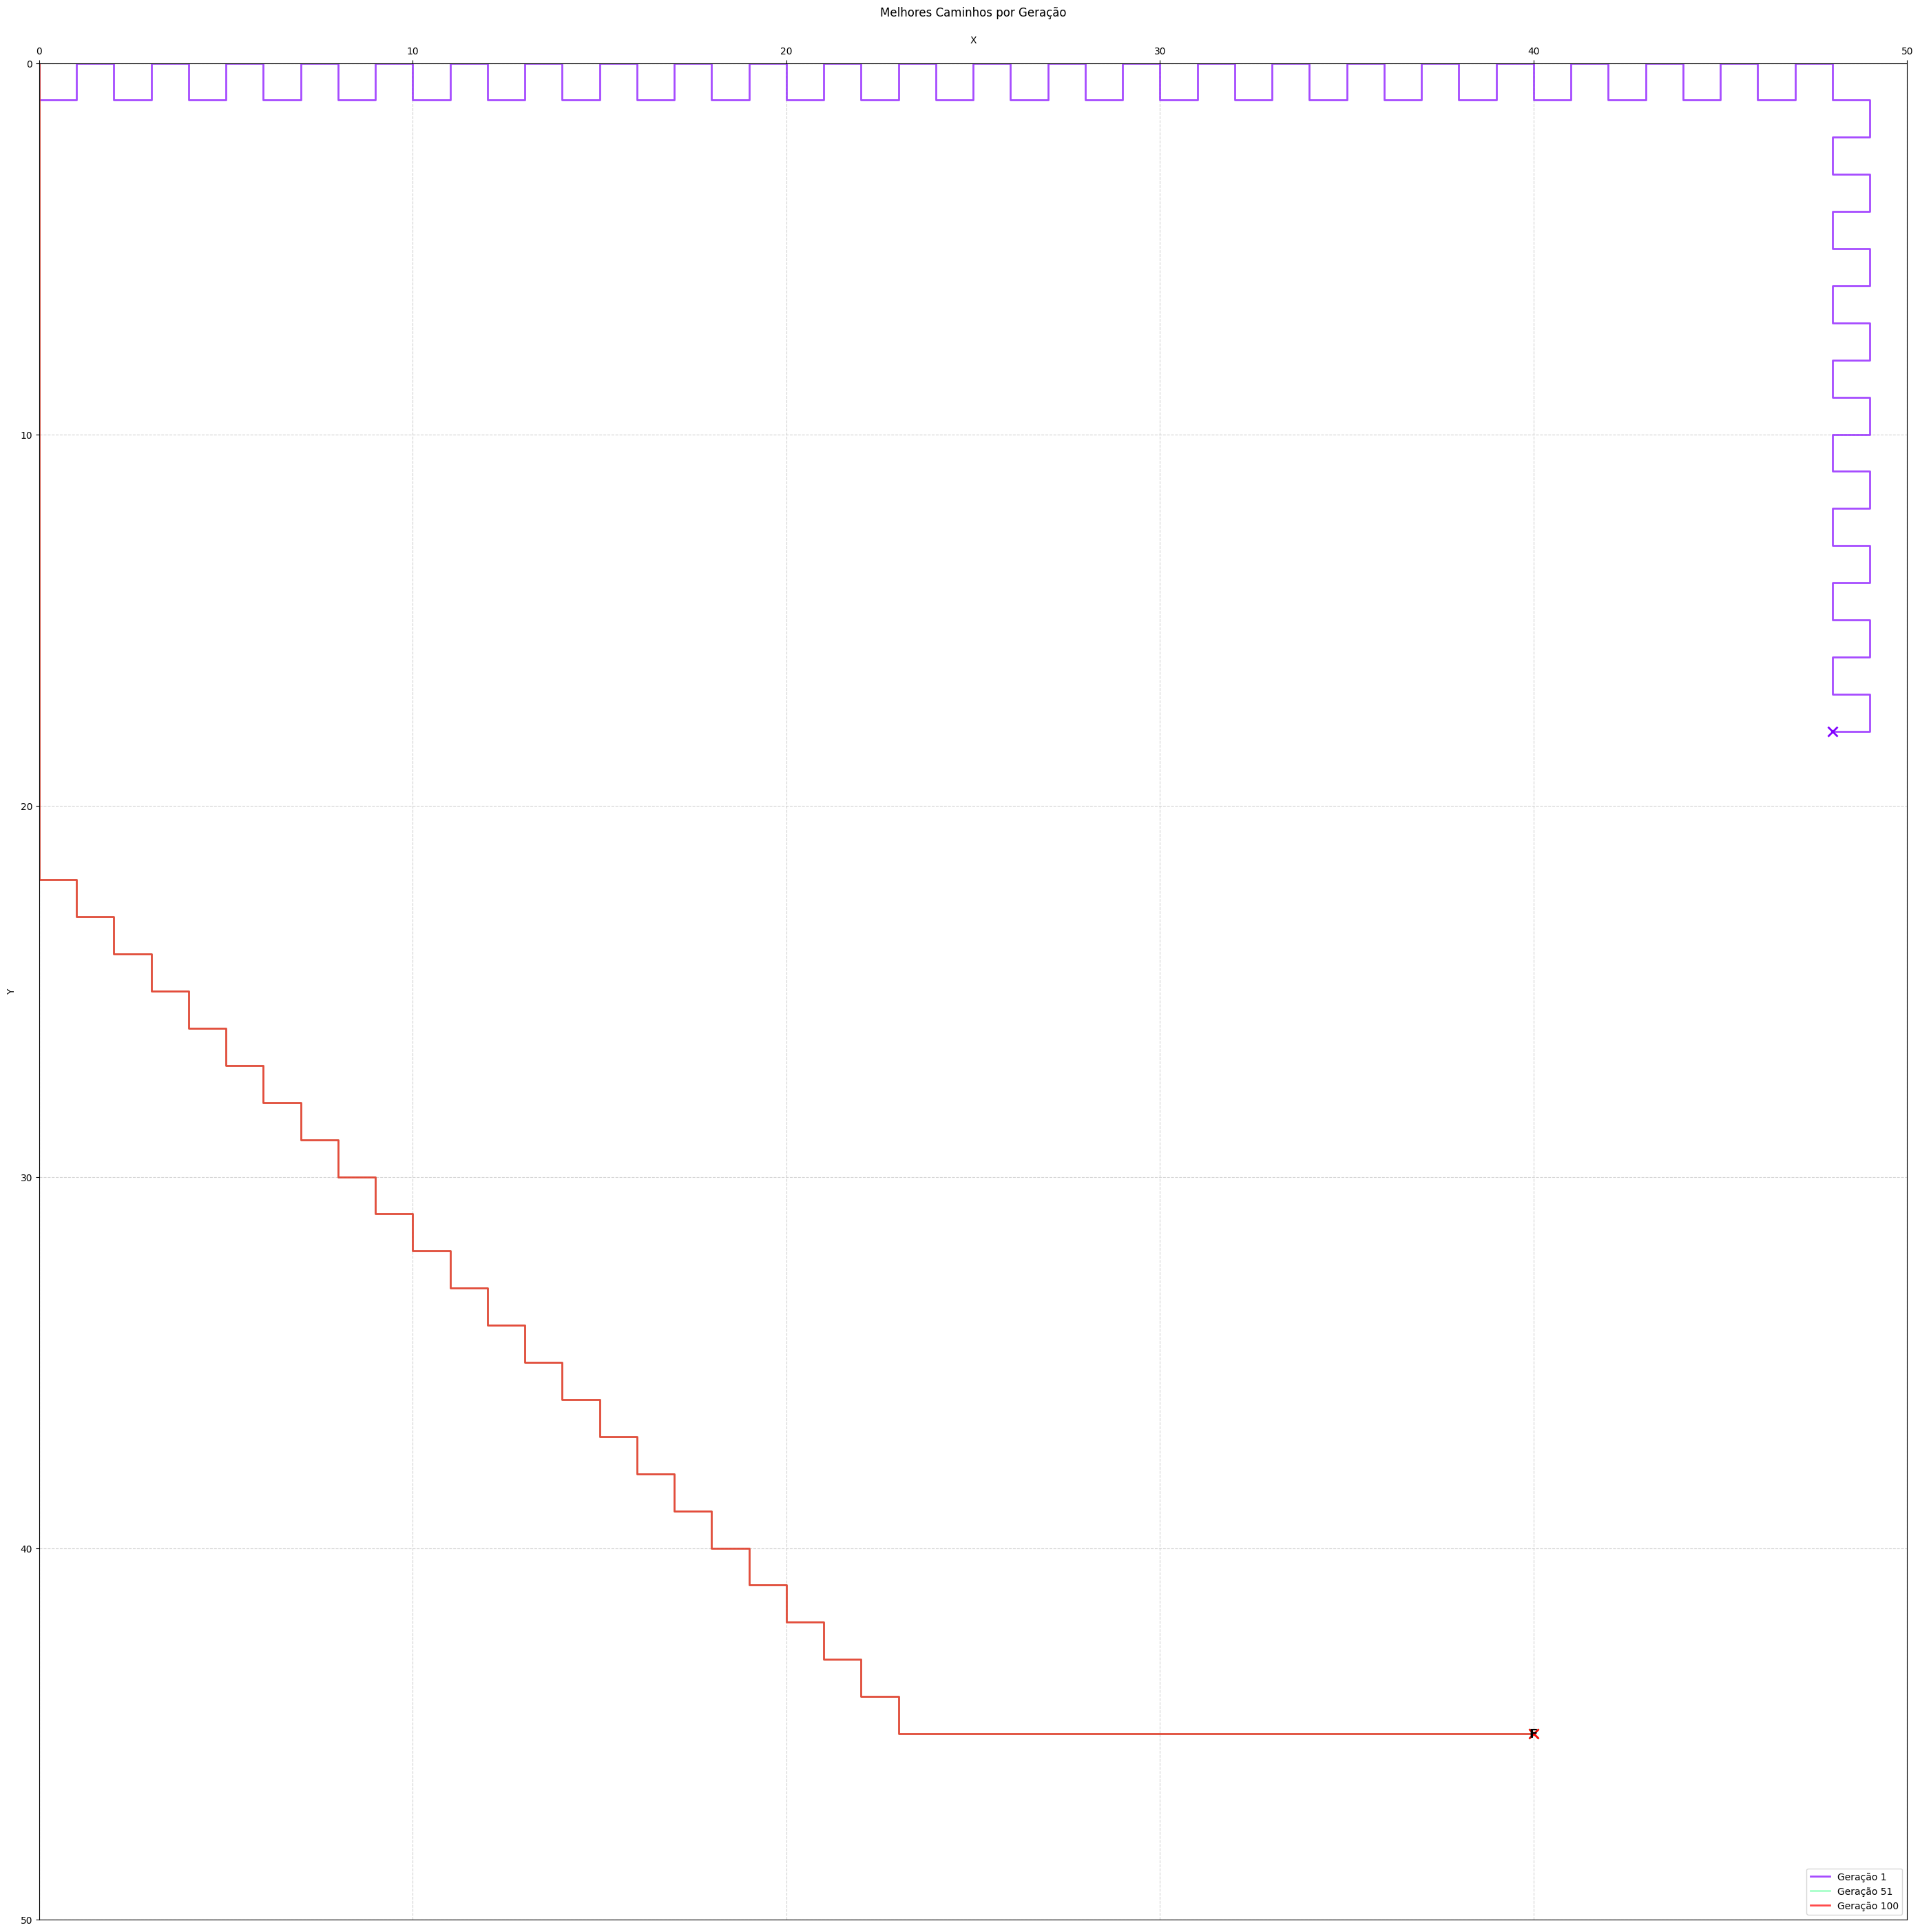

In [6]:
from controladorGenetico import reconstruir_caminho

motor = controlador.criar_motor("genetico")
agente =  motor.agentes[0]
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]

graficoCaminhos(caminhos,motor)

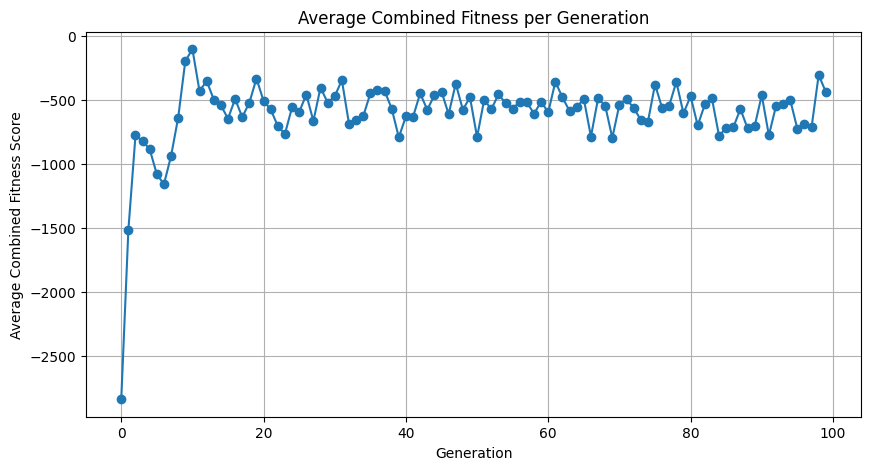

In [7]:
grafico_fitness_recompensas(controlador.fitness_medio_geracao,"genetico")

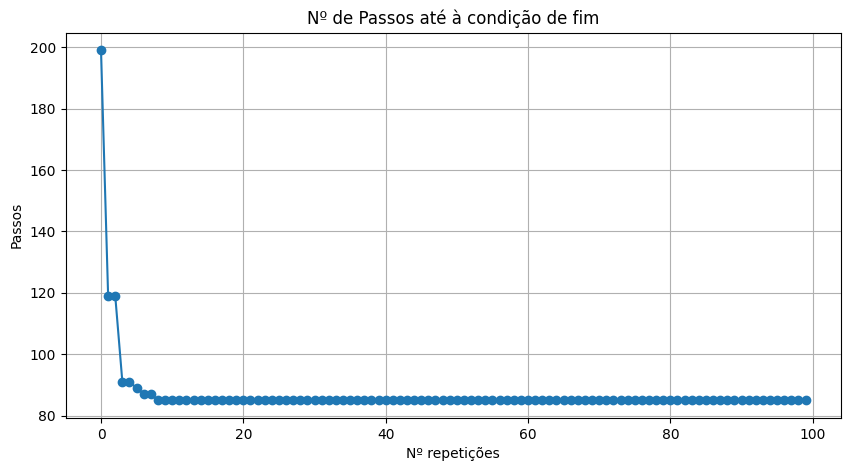

In [8]:
grafico_passos(controlador.numero_passos)

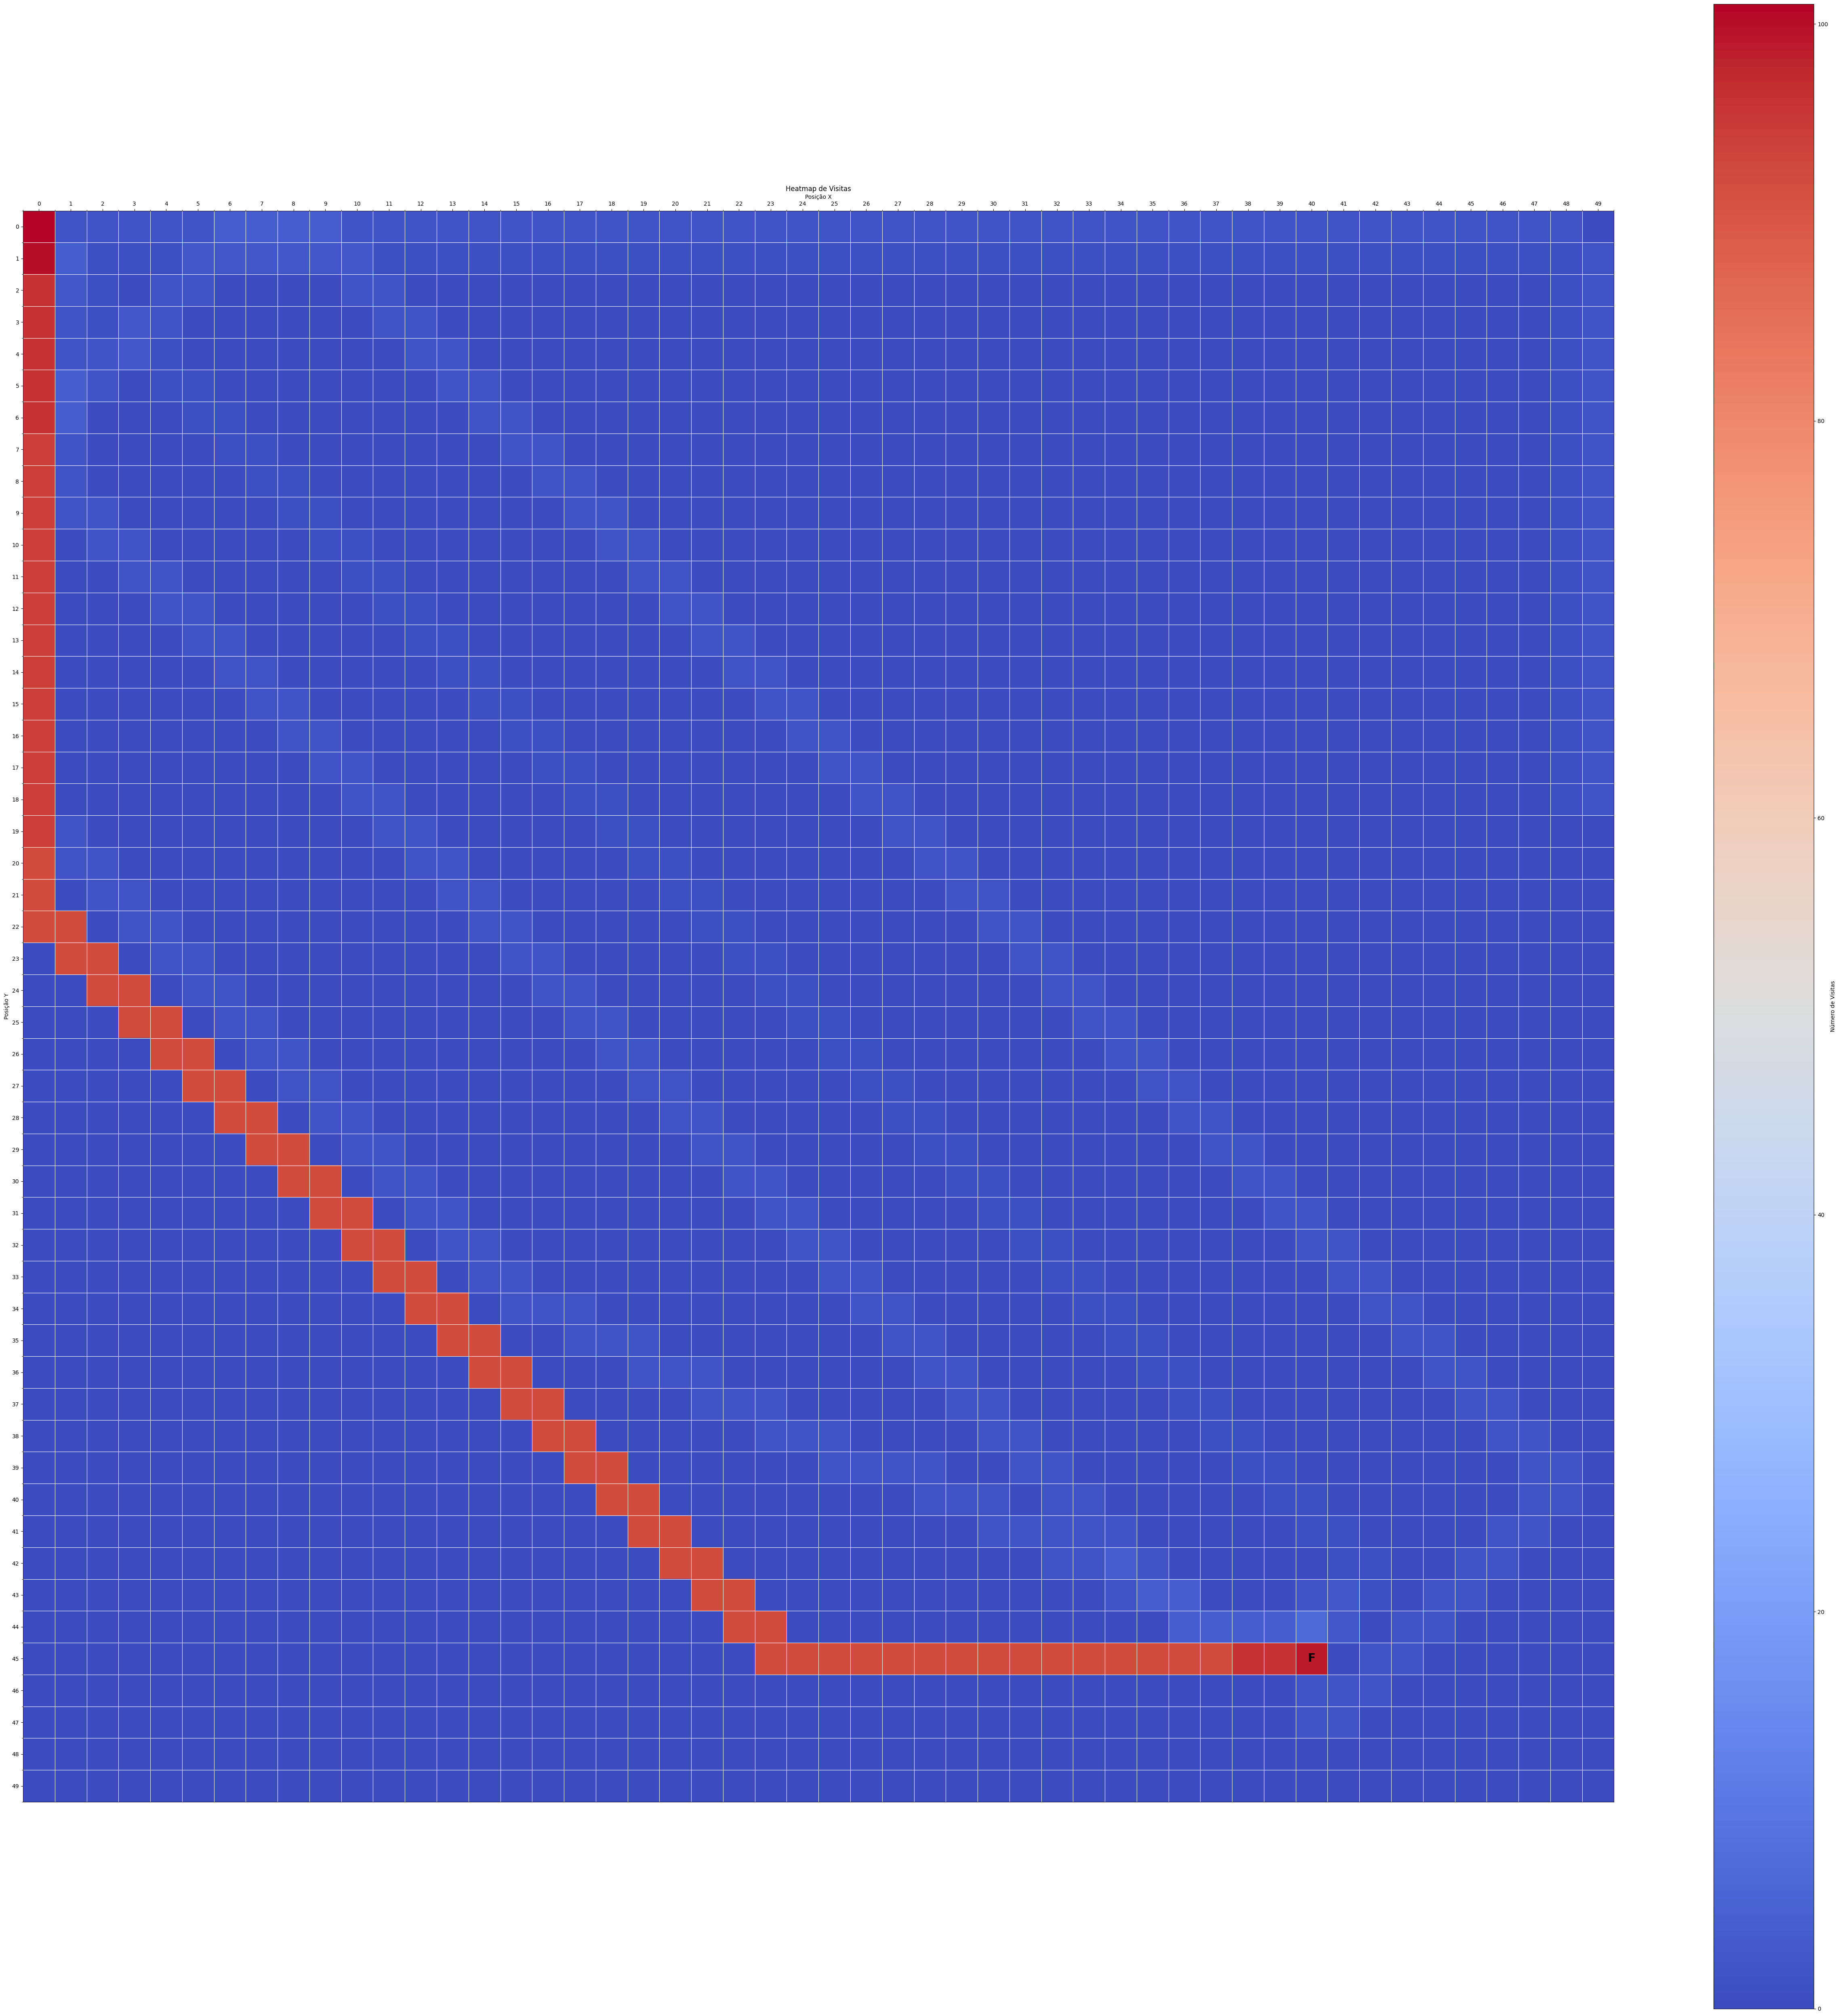

In [9]:
from controladorGenetico import calcular_mapa
motor = controlador.criar_motor("genetico")
agente = motor.agentes[0]
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]
mapa = calcular_mapa(caminhos,motor.ambiente.tamanhoGrelha)
criar_heatmap(mapa)

In [10]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

TclError: invalid command name ".!canvas"

### Recoleção

In [ ]:
from controlador import criarControlador

def resetRecolecaoGenetico(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica, tempo,geracoes,num_individuos,taxa_mutacao,taxa_elite,novelty_weight,num_novelty,num_archives,torneio):
    texto_controlador = f"A\nR {tempo}\n{politica}\n{geracoes}\n{num_individuos}\n{taxa_mutacao}\n{taxa_elite}\n{novelty_weight}\n{num_novelty}\n{num_archives}\n{torneio}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 7"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

In [ ]:
GERACOES = 100
NUM_INDIVIDUOS = 200
TAXA_MUTACAO = 0.1
TAXA_ELITE = 0.2
NOVELTY_WEIGHT = 1000
NUMBER_NOVELTY = 5
NUMBER_ARCHIVES = 5
NUM_TORNEIO = 5

ficheiro_controlador = "controladorGenetico_recolecao.txt"
resetRecolecaoGenetico(ficheiro_controlador, "simulacao_recolecao_genetico.txt", "agente_genetico_recolecao.txt", "genetico", 30,GERACOES,NUM_INDIVIDUOS,TAXA_MUTACAO,TAXA_ELITE,NOVELTY_WEIGHT,NUMBER_NOVELTY,NUMBER_ARCHIVES,NUM_TORNEIO)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [ ]:
motor = controlador.criar_motor("genetico")
agente =  motor.agentes[0]
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]

graficoCaminhos(caminhos,motor)

In [ ]:
grafico_fitness_recompensas(controlador.fitness_medio_geracao,"genetico")


In [ ]:
grafico_passos(controlador.numero_passos)

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste Algoritmo Reforço

### Farol

In [ ]:
from controlador import criarControlador

def resetFarolReforco(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,episodios,alpha,gama,eps_inicial,eps_final):
    texto_controlador = f"A\nF\n{politica}\n{episodios}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n20\nAG {ficheiro_agente}\nE farol (3,3) False False 100"
    texto_agente = f"1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)\n{alpha}\n{gama}\n{eps_inicial}\n{eps_final}"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)


def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)


In [ ]:
EPISODIOS = 20000
ALPHA = 0.2
GAMA = 0.90
EPS_INICIAL = 1
EPS_FINAL = 0.05

ficheiro_controlador = "controladorReforco_farol.txt"
resetFarolReforco(ficheiro_controlador, "simulacao_farol_reforco.txt", "agente_reforco_farol.txt", "reforco",
                  EPISODIOS,ALPHA,GAMA,EPS_INICIAL,EPS_FINAL)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [ ]:
print(type(controlador))
grafico_fitness_recompensas(controlador.melhores_recompensas_ep,"reforco")

In [ ]:
grafico_passos(controlador.numero_passos)

In [ ]:
from agentes.agenteReforco import lerDicionario

motor = controlador.criar_motor("reforco")
agente =  motor.agentes[0]
q = lerDicionario(agente.ficheiro)
criar_heatmap_ref(q)

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recolecao

In [ ]:
from controlador import criarControlador

def resetRecolecaoReforco(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,tempo,episodios,alpha,gama,eps_inicial,eps_final):
    texto_controlador = f"A\nR {tempo}\n{politica}\n{episodios}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 10"
    texto_agente = f"1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)\n{alpha}\n{gama}\n{eps_inicial}\n{eps_final}"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

In [ ]:
EPISODIOS = 20000
ALPHA = 0.2
GAMA = 0.90
EPS_INICIAL = 1
EPS_FINAL = 0.05

ficheiro_controlador = "controladorReforco_recolecao.txt"
resetRecolecaoReforco(ficheiro_controlador, "simulacao_recolecao_reforco.txt", "agente_reforco_recolecao.txt", "reforco",30,
                  EPISODIOS, ALPHA, GAMA, EPS_INICIAL, EPS_FINAL)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [ ]:
print(type(controlador))
grafico_fitness_recompensas(controlador.melhores_recompensas_ep,"reforco")

In [ ]:
grafico_passos(controlador.numero_passos)


In [ ]:
from agentes.agenteReforco import lerDicionario

motor = controlador.criar_motor("reforco")
agente =  motor.agentes[0]
q = lerDicionario(agente.ficheiro)
criar_heatmap_ref(q)

In [14]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()